In [17]:
import pandas as pd
import numpy as np
import os

# from azure.ai.ml import MLClient
# from azure.identity import DefaultAzureCredential
# from azure.ai.ml.entities import Data

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_csv(
    '/content/Hospital_Inpatient_Discharges_(SPARCS_De-Identified)__2024_20251129.csv',
    engine='python',
    on_bad_lines='warn'  # This helps skip/warn about broken lines rather than crashing
)

In [32]:
df.tail()

,Health Service Area,Hospital County,Operating Certificate Number,Permanent Facility Id,Facility Name,Age Group,Zip Code,Gender,Race,Ethnicity,...,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Emergency Department Indicator,Total Charges,Total Costs
2196732,New York City,New York,7002024.0,1456.0,MOUNT SINAI HOSPITAL,70 or Older,111,F,Multi-racial,Not Span/Hispanic,...,Moderate,Moderate,Surgical,Medicare,Medicare,Medicaid,NaN,N,59727.81,17084.60
2196733,Central NY,Jefferson,2238700.0,379.0,CARTHAGE AREA HOSPITAL INC,18-29,136,F,White,Not Span/Hispanic,...,Minor,Minor,Surgical,Federal/State/Local/VA,NaN,NaN,NaN,N,25474.57,43365.68
2196734,New York City,Kings,7001016.0,1301.0,KINGS COUNTY HOSPITAL CENTER,30-49,112,F,Black/African American,Unknown,...,Moderate,Minor,Surgical,Medicaid,NaN,NaN,NaN,N,51617.21,28211.54
2196735,Long Island,Nassau,7002053.0,511.0,NYU LANGONE HOSPITAL-LONG ISLAND,30-49,117,F,White,Not Span/Hispanic,...,Major,Moderate,Medical,Blue Cross/Blue Shield,NaN,NaN,NaN,N,60404.55,19568.72
2196736,New York City,Kings,7001035.0,1318.0,WYCKOFF HEIGHTS MEDICAL CENTER,30-49,113,F,Other Race,Spanish/Hispanic,...,Minor,Minor,Medical,Private Health Insurance,NaN,NaN,NaN,Y,6179.07,2238.09


In [33]:
df.columns

Index(['Health Service Area', 'Hospital County',
       'Operating Certificate Number', 'Permanent Facility Id',
       'Facility Name', 'Age Group', 'Zip Code', 'Gender', 'Race', 'Ethnicity',
       'Length of Stay', 'Type of Admission', 'Patient Disposition',
       'Discharge Year', 'CCSR Diagnosis Code', 'CCSR Diagnosis Description',
       'CCSR Procedure Code', 'CCSR Procedure Description', 'APR DRG Code',
       'APR DRG Description', 'APR MDC Code', 'APR MDC Description',
       'APR Severity of Illness Code', 'APR Severity of Illness Description',
       'APR Risk of Mortality', 'APR Medical Surgical Description',
       'Payment Typology 1', 'Payment Typology 2', 'Payment Typology 3',
       'Birth Weight', 'Emergency Department Indicator', 'Total Charges',
       'Total Costs'],
      dtype='object')

In [34]:
len(df)

2196737

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2196737 entries, 0 to 2196736
Data columns (total 33 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   Health Service Area                  object 
 1   Hospital County                      object 
 2   Operating Certificate Number         float64
 3   Permanent Facility Id                float64
 4   Facility Name                        object 
 5   Age Group                            object 
 6   Zip Code                             object 
 7   Gender                               object 
 8   Race                                 object 
 9   Ethnicity                            object 
 10  Length of Stay                       object 
 11  Type of Admission                    object 
 12  Patient Disposition                  object 
 13  Discharge Year                       int64  
 14  CCSR Diagnosis Code                  object 
 15  CCSR Diagnosis Description      

In [36]:
df.isna().sum()

,0
Health Service Area,5295
Hospital County,5295
Operating Certificate Number,5295
Permanent Facility Id,5295
Facility Name,0
Age Group,0
Zip Code,41972
Gender,0
Race,0
Ethnicity,0


In [37]:
df['Permanent Facility Id'].isna().sum()

np.int64(5295)

In [38]:
df.nunique()

,0
Health Service Area,8
Hospital County,57
Operating Certificate Number,158
Permanent Facility Id,205
Facility Name,203
Age Group,5
Zip Code,50
Gender,3
Race,4
Ethnicity,4


In [39]:
df['Health Service Area'].value_counts()

,count
Health Service Area,
New York City,996124
Long Island,359214
Hudson Valley,243870
Capital/Adirondacks,143613
Western NY,142041
Finger Lakes,140528
Central NY,138048
Southern Tier,28004


In [40]:
health_service_area_counts = df['Health Service Area'].value_counts().reset_index()
health_service_area_counts.columns = ['Health Service Area', 'Count']
print(health_service_area_counts)

   Health Service Area   Count
0        New York City  996124
1          Long Island  359214
2        Hudson Valley  243870
3  Capital/Adirondacks  143613
4           Western NY  142041
5         Finger Lakes  140528
6           Central NY  138048
7        Southern Tier   28004


/tmp/ipython-input-173312420.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


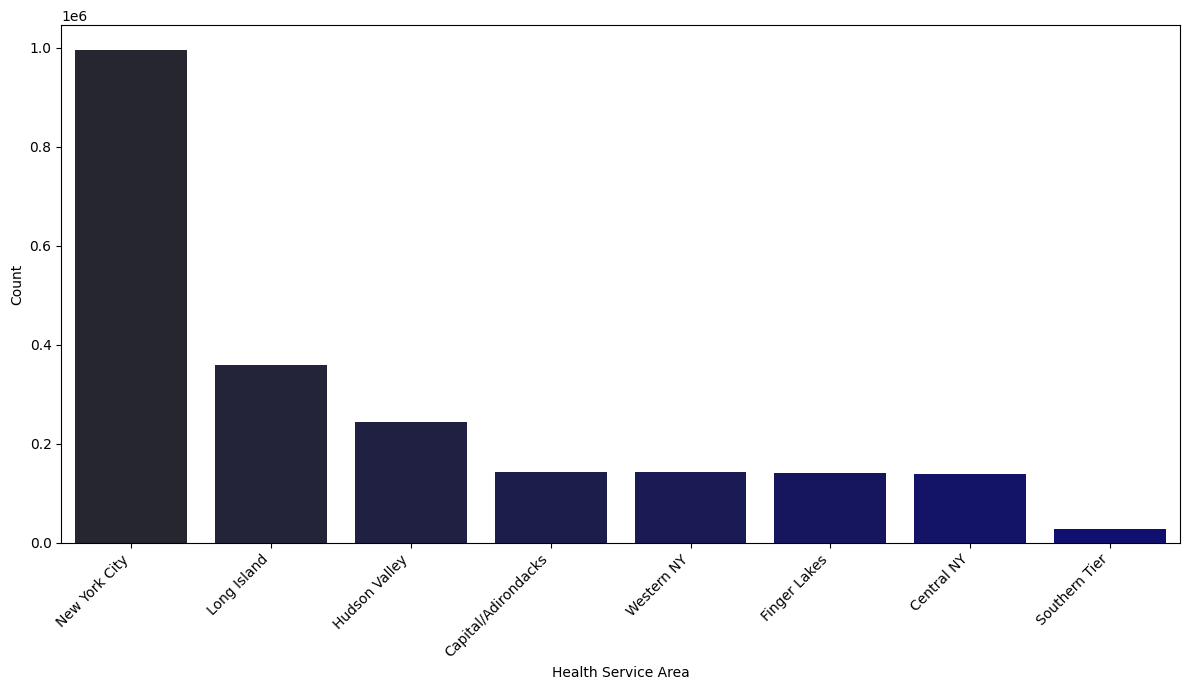

In [41]:
custom_blue = sns.dark_palette("navy", n_colors=len(health_service_area_counts), reverse=False)

plt.figure(figsize=(12, 7))
sns.barplot(
    x='Health Service Area',
    y='Count',
    data=health_service_area_counts,
    palette=custom_blue
)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

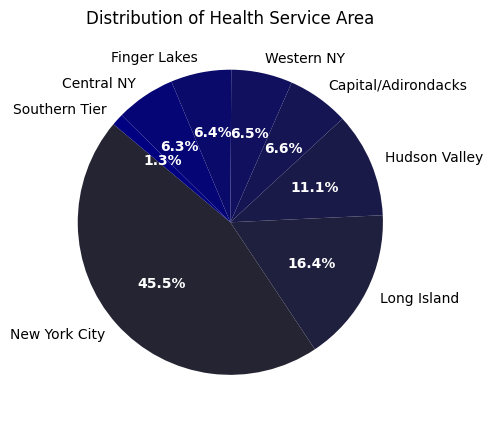

In [42]:
custom_blue = sns.dark_palette("navy", n_colors=len(health_service_area_counts), reverse=False)

# Function to format percentages in white
def white_autopct(pct):
    return f'{pct:.1f}%'  # just formats the number

plt.figure(figsize=(5, 5))
wedges, texts, autotexts = plt.pie(
    health_service_area_counts['Count'],
    labels=health_service_area_counts['Health Service Area'],
    colors=custom_blue,
    autopct=white_autopct,
    startangle=140
)

# Change percentage label colors to white
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

plt.title('Distribution of Health Service Area')
plt.tight_layout()
plt.show()

In [43]:
df_grouped = df.groupby('Health Service Area')['Total Costs'].mean().reset_index().sort_values(by='Total Costs', ascending=False)

In [44]:
df_grouped

,Health Service Area,Total Costs
5,New York City,32653.864956
4,Long Island,25070.785185
3,Hudson Valley,23233.531425
7,Western NY,20044.731956
2,Finger Lakes,18976.116511
1,Central NY,18027.263089
6,Southern Tier,16956.274751
0,Capital/Adirondacks,15777.292900


/tmp/ipython-input-2475270056.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Health Service Area', y='Total Costs', data=df_grouped, palette=custom_blue)


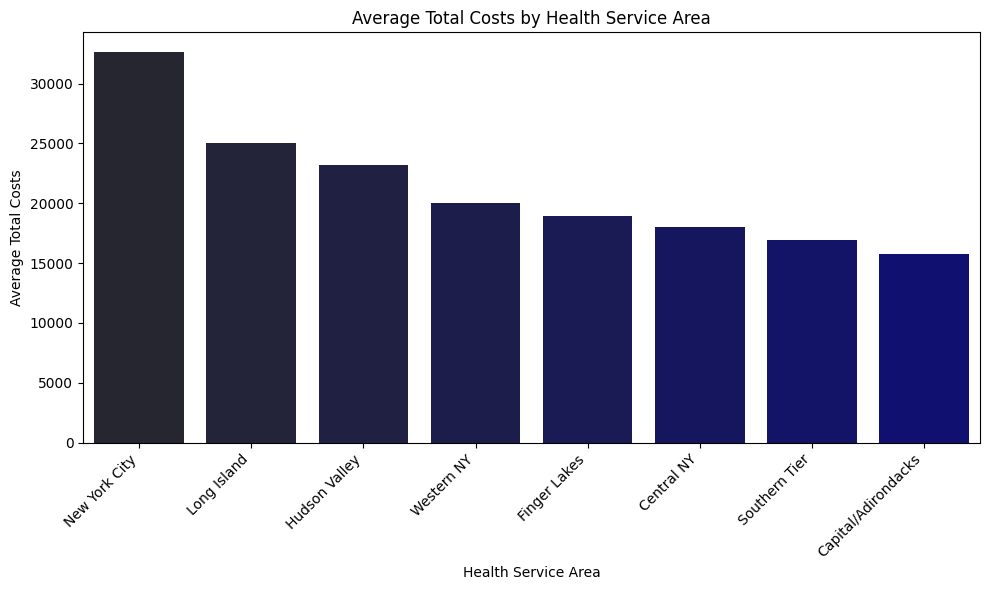

In [45]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Health Service Area', y='Total Costs', data=df_grouped, palette=custom_blue)
plt.title('Average Total Costs by Health Service Area')
plt.xlabel('Health Service Area')
plt.ylabel('Average Total Costs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [46]:
df['Hospital County'].value_counts().head()

,count
Hospital County,
New York,389375
Kings,200536
Nassau,192048
Queens,185610
Suffolk,167166


In [47]:
df_grouped_county = df.groupby('Hospital County').count().reset_index()
# Sort for better visualization, showing top/bottom counties clearly if desired
# df_grouped_county = df_grouped_county.sort_values(by='Total Costs', ascending=False).head(10)

In [48]:
df_grouped_county

,Hospital County,Health Service Area,Operating Certificate Number,Permanent Facility Id,Facility Name,Age Group,Zip Code,Gender,Race,Ethnicity,...,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Emergency Department Indicator,Total Charges,Total Costs
0,Albany,62047,62047,62047,62047,62047,61151,62047,62047,62047,...,62047,62047,62047,62011,17647,1023,5525,62047,62047,62047
1,Allegany,1949,1949,1949,1949,1949,1906,1949,1949,1949,...,1949,1949,1949,1949,602,26,340,1949,1949,1949
2,Bronx,165312,165312,165312,165312,165312,161318,165312,165312,165312,...,165312,165312,165312,165311,62774,7697,10669,165312,165312,165312
3,Broome,26630,26630,26630,26630,26630,26122,26630,26630,26630,...,26630,26630,26630,26630,8710,3354,2312,26630,26630,26630
4,Cattaraugus,6488,6488,6488,6488,6488,6445,6488,6488,6488,...,6488,6488,6488,6488,2671,215,585,6488,6488,6488
5,Cayuga,4992,4992,4992,4992,4992,4890,4992,4992,4992,...,4992,4992,4992,4992,2102,109,343,4992,4992,4992
6,Chautauqua,7514,7514,7514,7514,7514,7406,7514,7514,7514,...,7514,7514,7514,7514,2328,90,692,7514,7514,7514
7,Chemung,9392,9392,9392,9392,9392,9227,9392,9392,9392,...,9392,9392,9392,9392,6098,2441,1082,9392,9392,9392
8,Chenango,1374,1374,1374,1374,1374,1319,1374,1374,1374,...,1374,1374,1374,1374,473,31,207,1374,1374,1374
9,Clinton,8072,8072,8072,8072,8072,8001,8072,8072,8072,...,8072,8072,8072,8072,3330,220,588,8072,8072,8072


In [49]:
df['Hospital County'].isna().sum()

np.int64(5295)

In [50]:
df[df['Hospital County'].isna()]['Health Service Area'].isna().sum()

np.int64(5295)

In [51]:
df_grouped_county = df.groupby('Hospital County')['Total Costs'].mean().reset_index()
# Sort for better visualization, showing top/bottom counties clearly if desired
df_grouped_county = df_grouped_county.sort_values(by='Total Costs', ascending=False).head(10)

/tmp/ipython-input-3129279270.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Hospital County', y='Total Costs', data=df_grouped_county, palette='viridis')


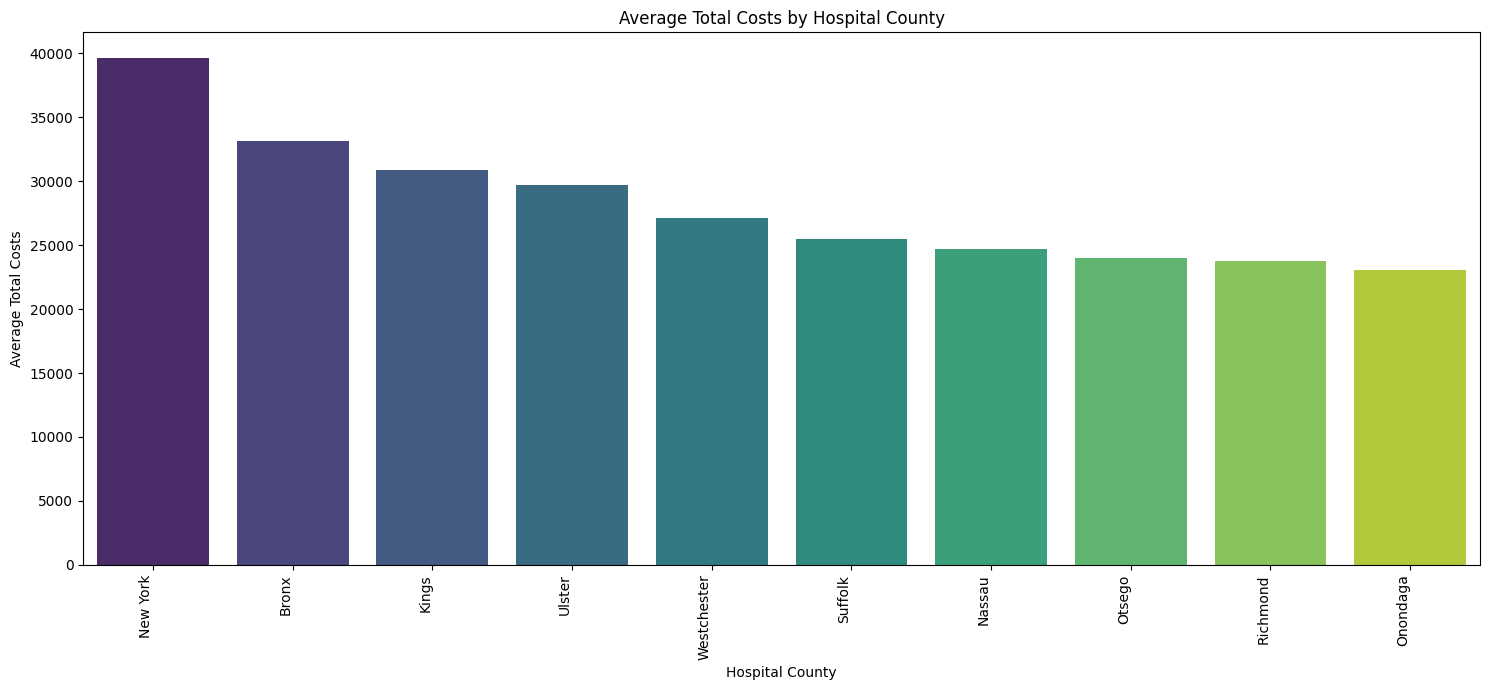

In [52]:
plt.figure(figsize=(15, 7))
sns.barplot(x='Hospital County', y='Total Costs', data=df_grouped_county, palette='viridis')
plt.title('Average Total Costs by Hospital County')
plt.xlabel('Hospital County')
plt.ylabel('Average Total Costs')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

In [53]:
df.columns

Index(['Health Service Area', 'Hospital County',
       'Operating Certificate Number', 'Permanent Facility Id',
       'Facility Name', 'Age Group', 'Zip Code', 'Gender', 'Race', 'Ethnicity',
       'Length of Stay', 'Type of Admission', 'Patient Disposition',
       'Discharge Year', 'CCSR Diagnosis Code', 'CCSR Diagnosis Description',
       'CCSR Procedure Code', 'CCSR Procedure Description', 'APR DRG Code',
       'APR DRG Description', 'APR MDC Code', 'APR MDC Description',
       'APR Severity of Illness Code', 'APR Severity of Illness Description',
       'APR Risk of Mortality', 'APR Medical Surgical Description',
       'Payment Typology 1', 'Payment Typology 2', 'Payment Typology 3',
       'Birth Weight', 'Emergency Department Indicator', 'Total Charges',
       'Total Costs'],
      dtype='object')

In [54]:
df['Age Group'].value_counts()

,count
Age Group,
70 or Older,706970
50-69,581333
30-49,423270
0-17,301927
18-29,183237


In [55]:
age_counts = df['Age Group'].value_counts().reset_index()
age_counts.columns = ['Age Group', 'Count']
print(age_counts)

     Age Group   Count
0  70 or Older  706970
1        50-69  581333
2        30-49  423270
3         0-17  301927
4        18-29  183237


/tmp/ipython-input-691345422.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


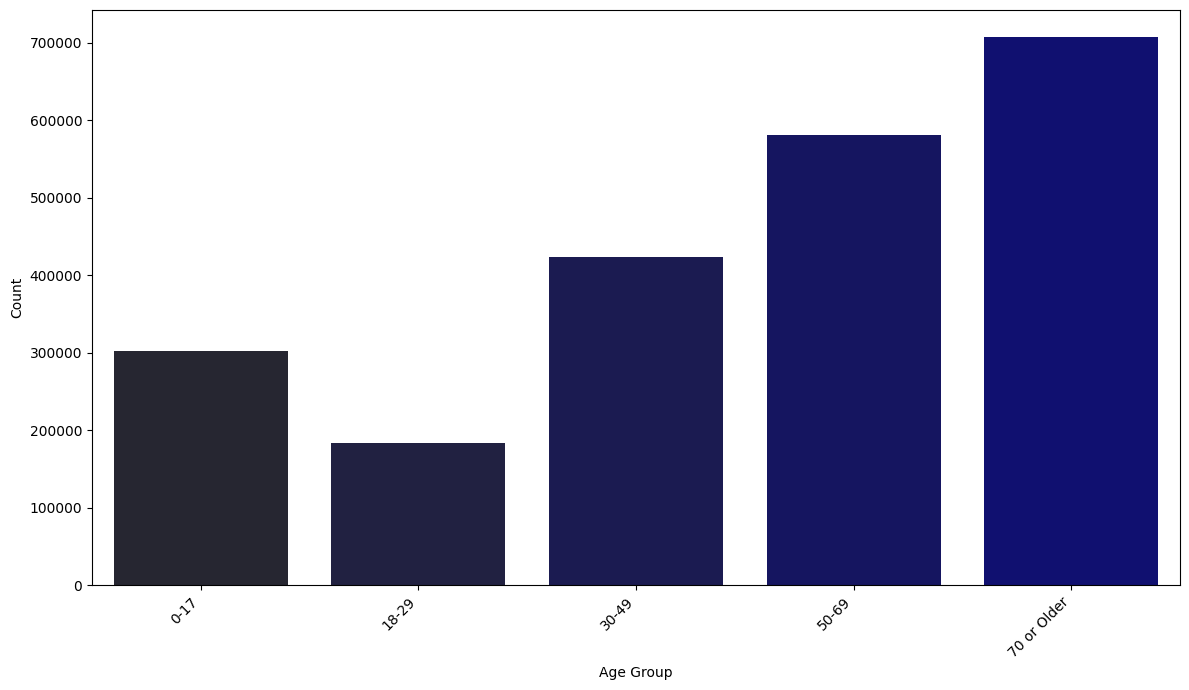

In [56]:
custom_blue = sns.dark_palette("navy", n_colors=len(age_counts), reverse=False)
custom_order = [
    "0-17",
    "18-29",
    "30-49",
    "50-69",
    "70 or Older"
]

plt.figure(figsize=(12, 7))
sns.barplot(
    x='Age Group',
    y='Count',
    data=age_counts,
    palette=custom_blue,
    order=custom_order
)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [57]:
df_grouped = df.groupby('Age Group')['Total Costs'].mean().reset_index()

/tmp/ipython-input-3025932548.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age Group', y='Total Costs', data=df_grouped, palette=custom_blue, order=custom_order)


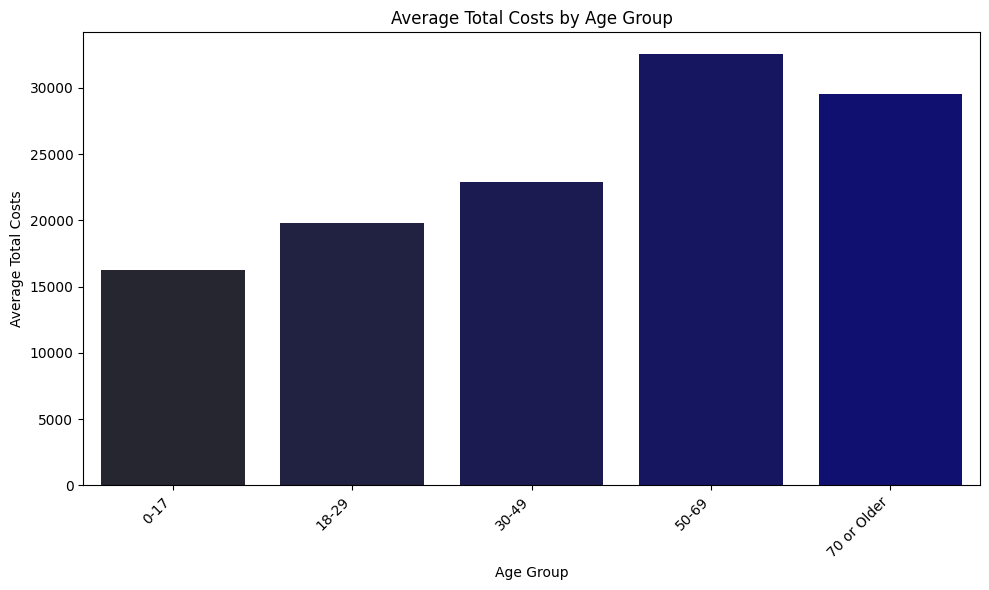

In [58]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Age Group', y='Total Costs', data=df_grouped, palette=custom_blue, order=custom_order)
plt.title('Average Total Costs by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Total Costs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [59]:
df['Length of Stay'] = df['Length of Stay'].replace('120+', 120).astype(int)

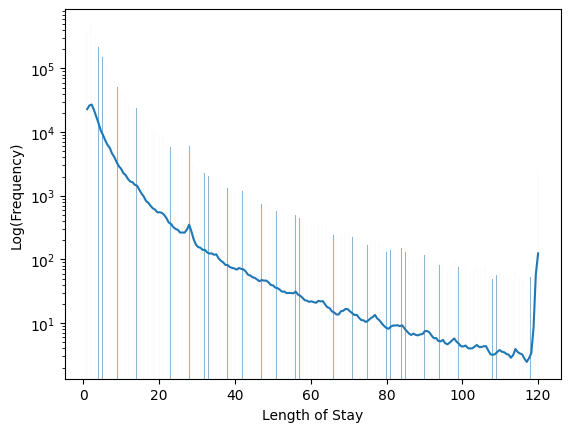

In [60]:
sns.histplot(df['Length of Stay'], kde=True)
# plt.title('Distribution of Length of Stay')
plt.xlabel('Length of Stay')
plt.ylabel('Log(Frequency)')
plt.yscale('log')
plt.show()

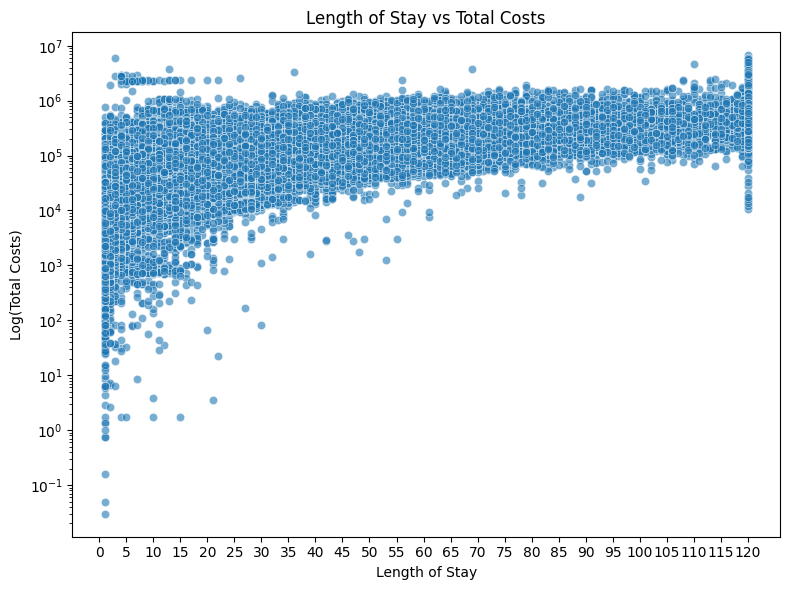

In [61]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Length of Stay',
    y='Total Costs',
    data=df,
    alpha=0.4
)

plt.title("Length of Stay vs Total Costs")
plt.xticks(ticks=range(0, df['Length of Stay'].max()+1, 5))
plt.yscale('log')
plt.xlabel('Length of Stay')
plt.ylabel('Log(Total Costs)')
plt.tight_layout()
plt.show()


In [62]:
df['APR Severity of Illness Code'].value_counts()

,count
APR Severity of Illness Code,
2,820465
1,619207
3,573480
4,183129
0,456


In [63]:
age_counts = df['APR Severity of Illness Code'].value_counts().reset_index()
age_counts.columns = ['APR Severity of Illness Code', 'Count']
print(age_counts)

   APR Severity of Illness Code   Count
0                             2  820465
1                             1  619207
2                             3  573480
3                             4  183129
4                             0     456


/tmp/ipython-input-1760237120.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


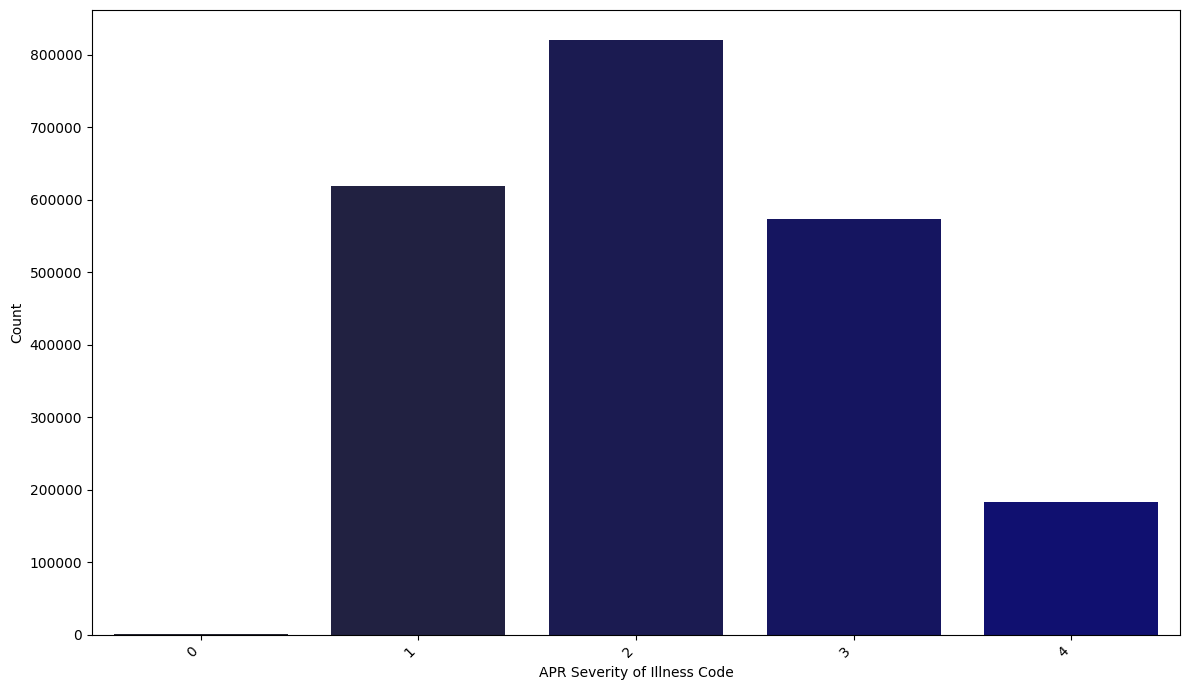

In [64]:
custom_blue = sns.dark_palette("navy", n_colors=len(age_counts), reverse=False)
custom_order = [0, 1, 2, 3, 4, ]

plt.figure(figsize=(12, 7))
sns.barplot(
    x='APR Severity of Illness Code',
    y='Count',
    data=age_counts,
    palette=custom_blue,
    order=custom_order
)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [65]:
df_grouped = df.groupby('APR Severity of Illness Code')['Total Costs'].mean().reset_index()

/tmp/ipython-input-2343333814.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='APR Severity of Illness Code', y='Total Costs', data=df_grouped, palette=custom_blue, order=custom_order)


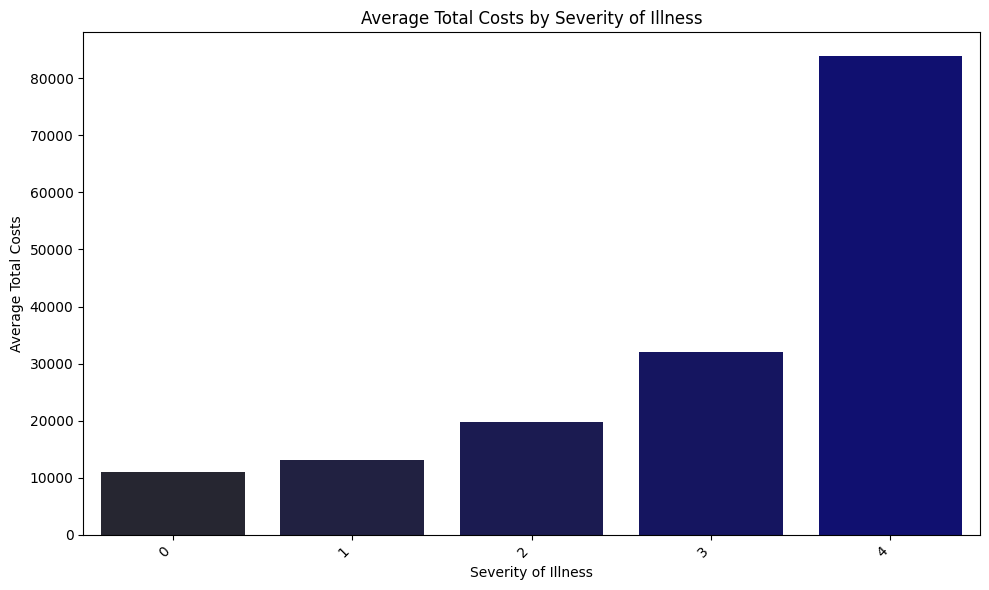

In [66]:
plt.figure(figsize=(10, 6))
sns.barplot(x='APR Severity of Illness Code', y='Total Costs', data=df_grouped, palette=custom_blue, order=custom_order)
plt.title('Average Total Costs by Severity of Illness')
plt.xlabel('Severity of Illness')
plt.ylabel('Average Total Costs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

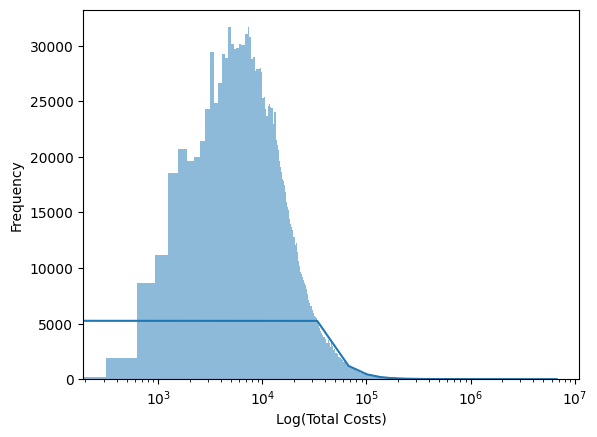

In [67]:
sns.histplot(df['Total Costs'], kde=True)
# plt.title('Distribution of Length of Stay')
plt.xlabel('Log(Total Costs)')
plt.ylabel('Frequency')
plt.xscale('log')
plt.show()

In [68]:
df_corr = df.drop(columns=['Discharge Year','Total Charges']).corr(numeric_only=True)

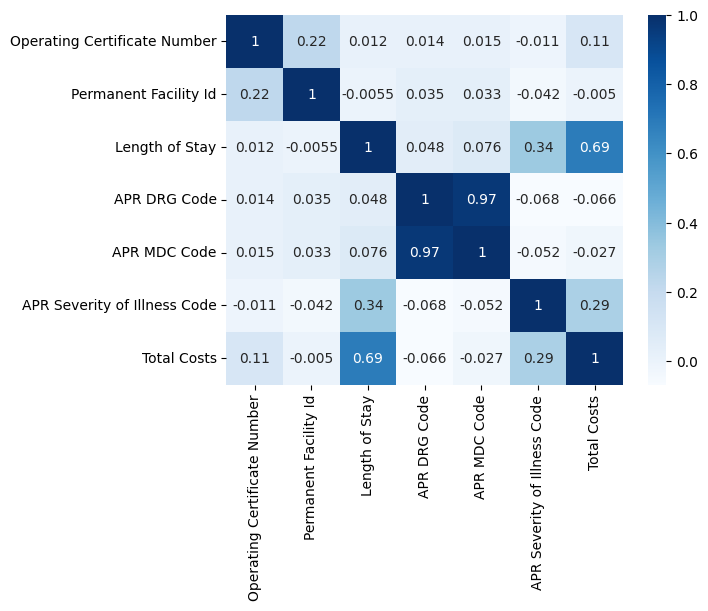

In [69]:
sns.heatmap(df_corr, annot=True, cmap='Blues')
plt.show()

In [70]:
df[['APR MDC Code','APR DRG Code']].value_counts()

APR MDC Code  APR DRG Code
15            640             168494
18            720             144367
14            560             123398
5             194              60015
14            540              59419
                               ...  
2             5                    1
              8                    1
1             7                    1
              6                    1
              2                    1
Name: count, Length: 494, dtype: int64

In [71]:
df['Operating Certificate Number'].isna().sum()

np.int64(5295)

In [72]:
df['Operating Certificate Number'].nunique()

158